**NAME: SHRAVYA SHASHIDHAR  
USERNAME:sshashid@usc.edu  
USCID: 2763825542**

**(a) Download the Accute In
amations data from https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations.**

Ans: Done and stored in the data folder 

**b)Build a decision tree on the whole data set and plot it.**

In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [45]:
diagnosis_data=pd.read_csv("../data/diagnosis.csv", encoding='utf-16',sep="\t",decimal=',')
diagnosis_data = diagnosis_data.replace({'no':0,'yes':1})
diagnosis_data

,"35,5",no,yes,no.1,no.2,no.3,no.4,no.5
0,35.9,0,0,1,1,1,1,0
1,35.9,0,1,0,0,0,0,0
2,36.0,0,0,1,1,1,1,0
3,36.0,0,1,0,0,0,0,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
114,41.4,0,1,1,0,1,0,1
115,41.5,0,0,0,0,0,0,0
116,41.5,1,1,0,1,0,0,1
117,41.5,0,1,1,0,1,0,1


In [46]:
attributes=["Patient_temp","Nausea","Lumbar_pain","Urination","Micturition_pain","Urethra_issues","Inflammation","Nephritis"]
diagnosis_data.columns=attributes
diagnosis_data

,Patient_temp,Nausea,Lumbar_pain,Urination,Micturition_pain,Urethra_issues,Inflammation,Nephritis
0,35.9,0,0,1,1,1,1,0
1,35.9,0,1,0,0,0,0,0
2,36.0,0,0,1,1,1,1,0
3,36.0,0,1,0,0,0,0,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
114,41.4,0,1,1,0,1,0,1
115,41.5,0,0,0,0,0,0,0
116,41.5,1,1,0,1,0,0,1
117,41.5,0,1,1,0,1,0,1


In [47]:
diagnosis_data['Diagnosis']=np.where(
    (diagnosis_data['Inflammation'] == 0) & (diagnosis_data['Nephritis'] == 0), 0, 
    np.where(
        (diagnosis_data['Inflammation'] == 1) & (diagnosis_data['Nephritis'] == 0), 1, 
        np.where(
            (diagnosis_data['Inflammation'] == 0) & (diagnosis_data['Nephritis'] == 1), 2, 
            3 )))
diagnosis_data

,Patient_temp,Nausea,Lumbar_pain,Urination,Micturition_pain,Urethra_issues,Inflammation,Nephritis,Diagnosis
0,35.9,0,0,1,1,1,1,0,1
1,35.9,0,1,0,0,0,0,0,0
2,36.0,0,0,1,1,1,1,0,1
3,36.0,0,1,0,0,0,0,0,0
4,36.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
114,41.4,0,1,1,0,1,0,1,2
115,41.5,0,0,0,0,0,0,0,0
116,41.5,1,1,0,1,0,0,1,2
117,41.5,0,1,1,0,1,0,1,2


**Ref: how to check 4 conditions and replace a value in columns(chatgpt)**

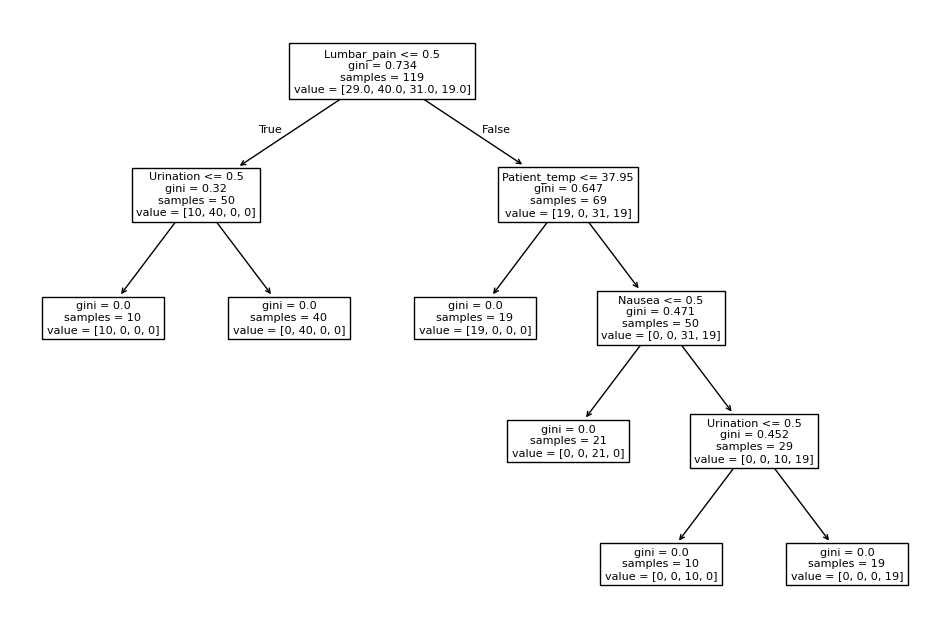

In [49]:
x_train=diagnosis_data.drop(diagnosis_data.columns[-3:],axis=1)
y_train=diagnosis_data.iloc[:, -1:]
att_names=attributes[:-2]
tree_model=DecisionTreeClassifier(random_state=4)
tree_model=tree_model.fit(x_train,y_train)
plt.figure(figsize=(12,8)) 
plot_tree(tree_model,feature_names=att_names)
plt.show()

**(c)Convert the decision rules into a set of IF-THEN rules**

In [115]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            counts = tree_.value[node] * tree_.weighted_n_node_samples[node]
            print("{}return {}".format(indent, counts))
           

    recurse(0, 1)	


In [116]:
tree_to_code(tree_model, att_names)

def tree(Patient_temp, Nausea, Lumbar_pain, Urination, Micturition_pain, Urethra_issues):
  if Lumbar_pain <= 0.5:
    if Urination <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if Urination > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Lumbar_pain > 0.5
    if Patient_temp <= 37.95000076293945:
      return [[19.  0.  0.  0.]]
    else:  # if Patient_temp > 37.95000076293945
      if Nausea <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Nausea > 0.5
        if Urination <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urination > 0.5
          return [[ 0.  0.  0. 19.]]


**Ref: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.
html.**

**(d)Use cost-complexity pruning to and a minimal decision tree and a set of decision
rules with high interpretability.**

In [117]:
path=tree_model.cost_complexity_pruning_path(x_train,y_train)
alpha_to_use=path.ccp_alphas

In [118]:
dt_model=DecisionTreeClassifier(random_state=42)
selected_model=GridSearchCV(dt_model,{'ccp_alpha':alpha_to_use},cv=5)
selected_model.fit(x_train,y_train)
setofalphas,setofscore=cc_model.cv_results_['param_ccp_alpha'],cc_model.cv_results_['mean_test_score']
res=pd.DataFrame({'alpha':opt_alphas,'score':opt_score})
print(res)

      alpha     score
0  0.000000  0.958333
1  0.098167  0.775000
2  0.133333  0.716667
3  0.182000  0.600000
4  0.222917  0.433333


Choosing alpha to be 0 with the highest score 

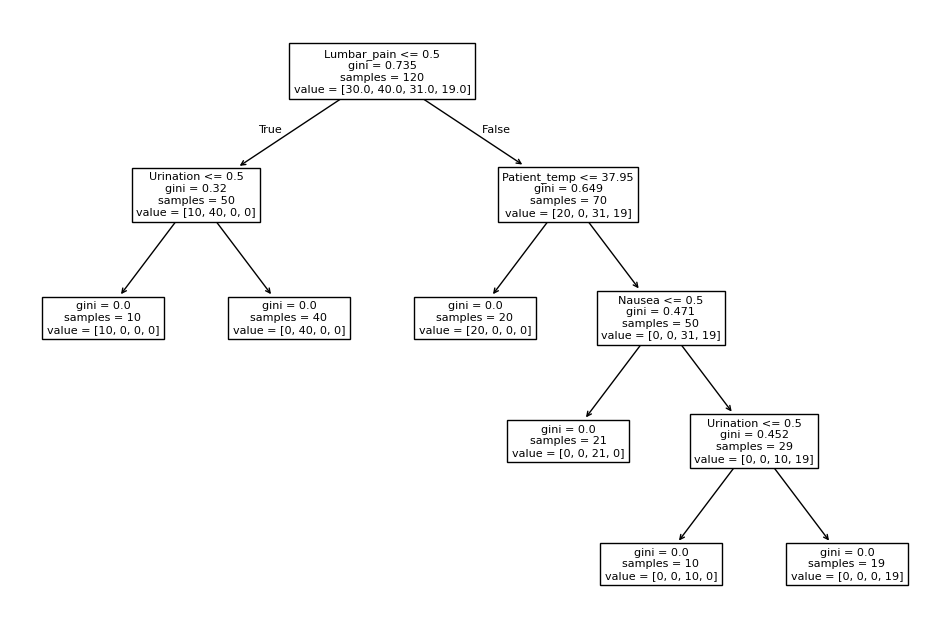

In [48]:
pruned_tree=DecisionTreeClassifier(random_state=42,ccp_alpha=0)
pruned_tree=pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(pruned_tree,feature_names=att_names)
plt.show()

No change, setting the value of alpha to be 0.098167 

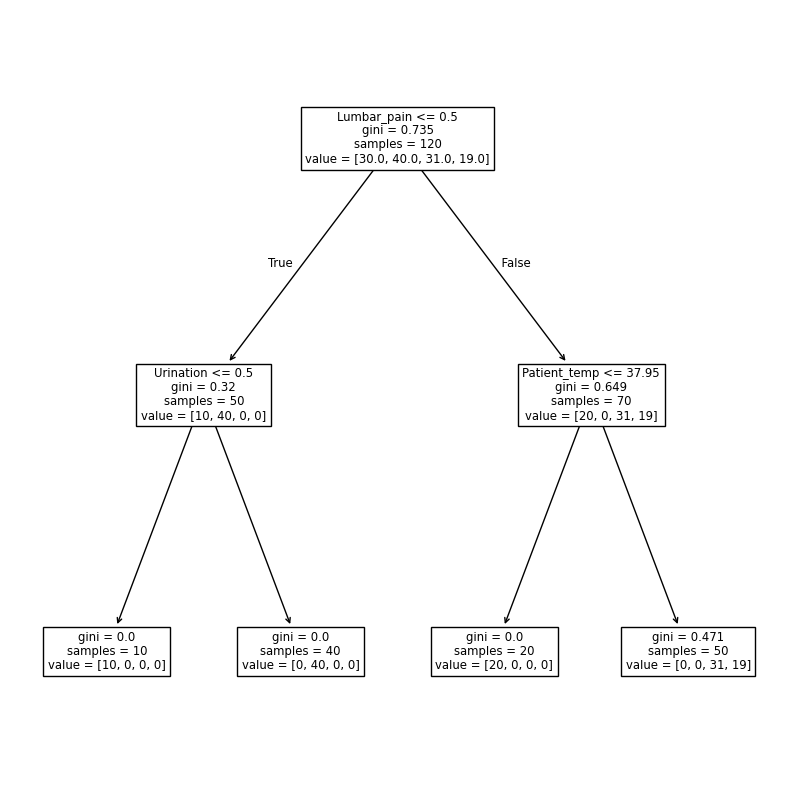

In [104]:
pruned_tree=DecisionTreeClassifier(random_state=42,ccp_alpha=0.098167)
pruned_tree=pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(10,10))
plot_tree(pruned_tree,feature_names=att_names)
plt.show()

In [119]:
tree_to_code(pruned_tree, att_names)

def tree(Patient_temp, Nausea, Lumbar_pain, Urination, Micturition_pain, Urethra_issues):
  if Lumbar_pain <= 0.5:
    if Urination <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if Urination > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Lumbar_pain > 0.5
    if Patient_temp <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Patient_temp > 37.95000076293945
      return [[ 0.  0. 31. 19.]]


**Ref: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.
html.**

**2. The LASSO and Boosting for Regression**

(a)Download the Communities and Crime data3 from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [3]:
communities_data=pd.read_csv("../data/communities.csv",header=None)
communities_data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
attributes=['state','county','community','communityname','fold','population','householdsize','racepctblack', 
            'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
            'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
            'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
            'OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore', 
            'PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
            'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
            'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5',
            'PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly',
            'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous',
            'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc',
            'PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
            'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 
            'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
            'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
            'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 
            'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
            'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']
imp_attributes=['population','householdsize','racepctblack', 
            'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
            'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
            'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
            'OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore', 
            'PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
            'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
            'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5',
            'PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly',
            'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous',
            'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc',
            'PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
            'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 
            'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
            'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
            'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 
            'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
            'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

In [5]:
communities_data.columns=attributes
communities_data.replace('?',np.nan,inplace=True)
display(communities_data)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
x_train=communities_data.iloc[:1495,:]
x_test=communities_data.iloc[1495:,:]

In [7]:
display(x_train)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [8]:
display(x_test)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


(b)The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [9]:
communities_data=communities_data.drop(communities_data.columns[:5],axis=1)
communities_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [10]:
imp=SimpleImputer()
imp.fit(communities_data)
imputed_data=imp.fit_transform(communities_data)
imputed_data=pd.DataFrame(imputed_data,columns=imp_attributes)
display(imputed_data)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


(c) Plot a correlation matrix for the features in the data set.

Text(0.5, 1.0, 'correlation matrix')

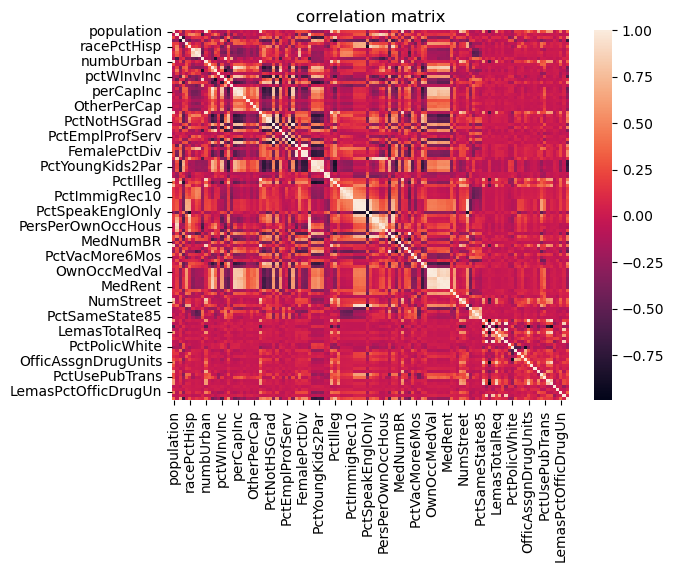

In [11]:
sns.heatmap(imputed_data.corr())
plt.title("correlation matrix")

(d) Calculate the Coeffcient of Variation CV for each feature, where CV = s/m, in
which s is sample standard deviation and m is sample mean..

In [12]:
s=imputed_data.std()
m=imputed_data.mean()
cv={}
cv['CV']=s/m
CV=pd.DataFrame.from_dict(cv)
CV

,CV
population,2.203503
householdsize,0.353298
racepctblack,1.410920
racePctWhite,0.323782
racePctAsian,1.359162
...,...
LemasPctPolicOnPatr,0.122331
LemasGangUnitDeploy,0.368040
LemasPctOfficDrugUn,2.555266
PolicBudgPerPop,0.337281


(e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [13]:
features=math.floor(math.sqrt(128))
communities_highest_cv=CV.sort_values(by=['CV'],ascending=False)
communities_highest_cv=communities_highest_cv.head(features)
communities_highest_cv

,CV
NumStreet,4.407702
NumInShelters,3.485481
NumIlleg,2.994196
NumImmig,2.900497
LemasPctOfficDrugUn,2.555266
NumUnderPov,2.304970
population,2.203503
numbUrban,2.001744
HousVacant,1.958780
LandArea,1.678031


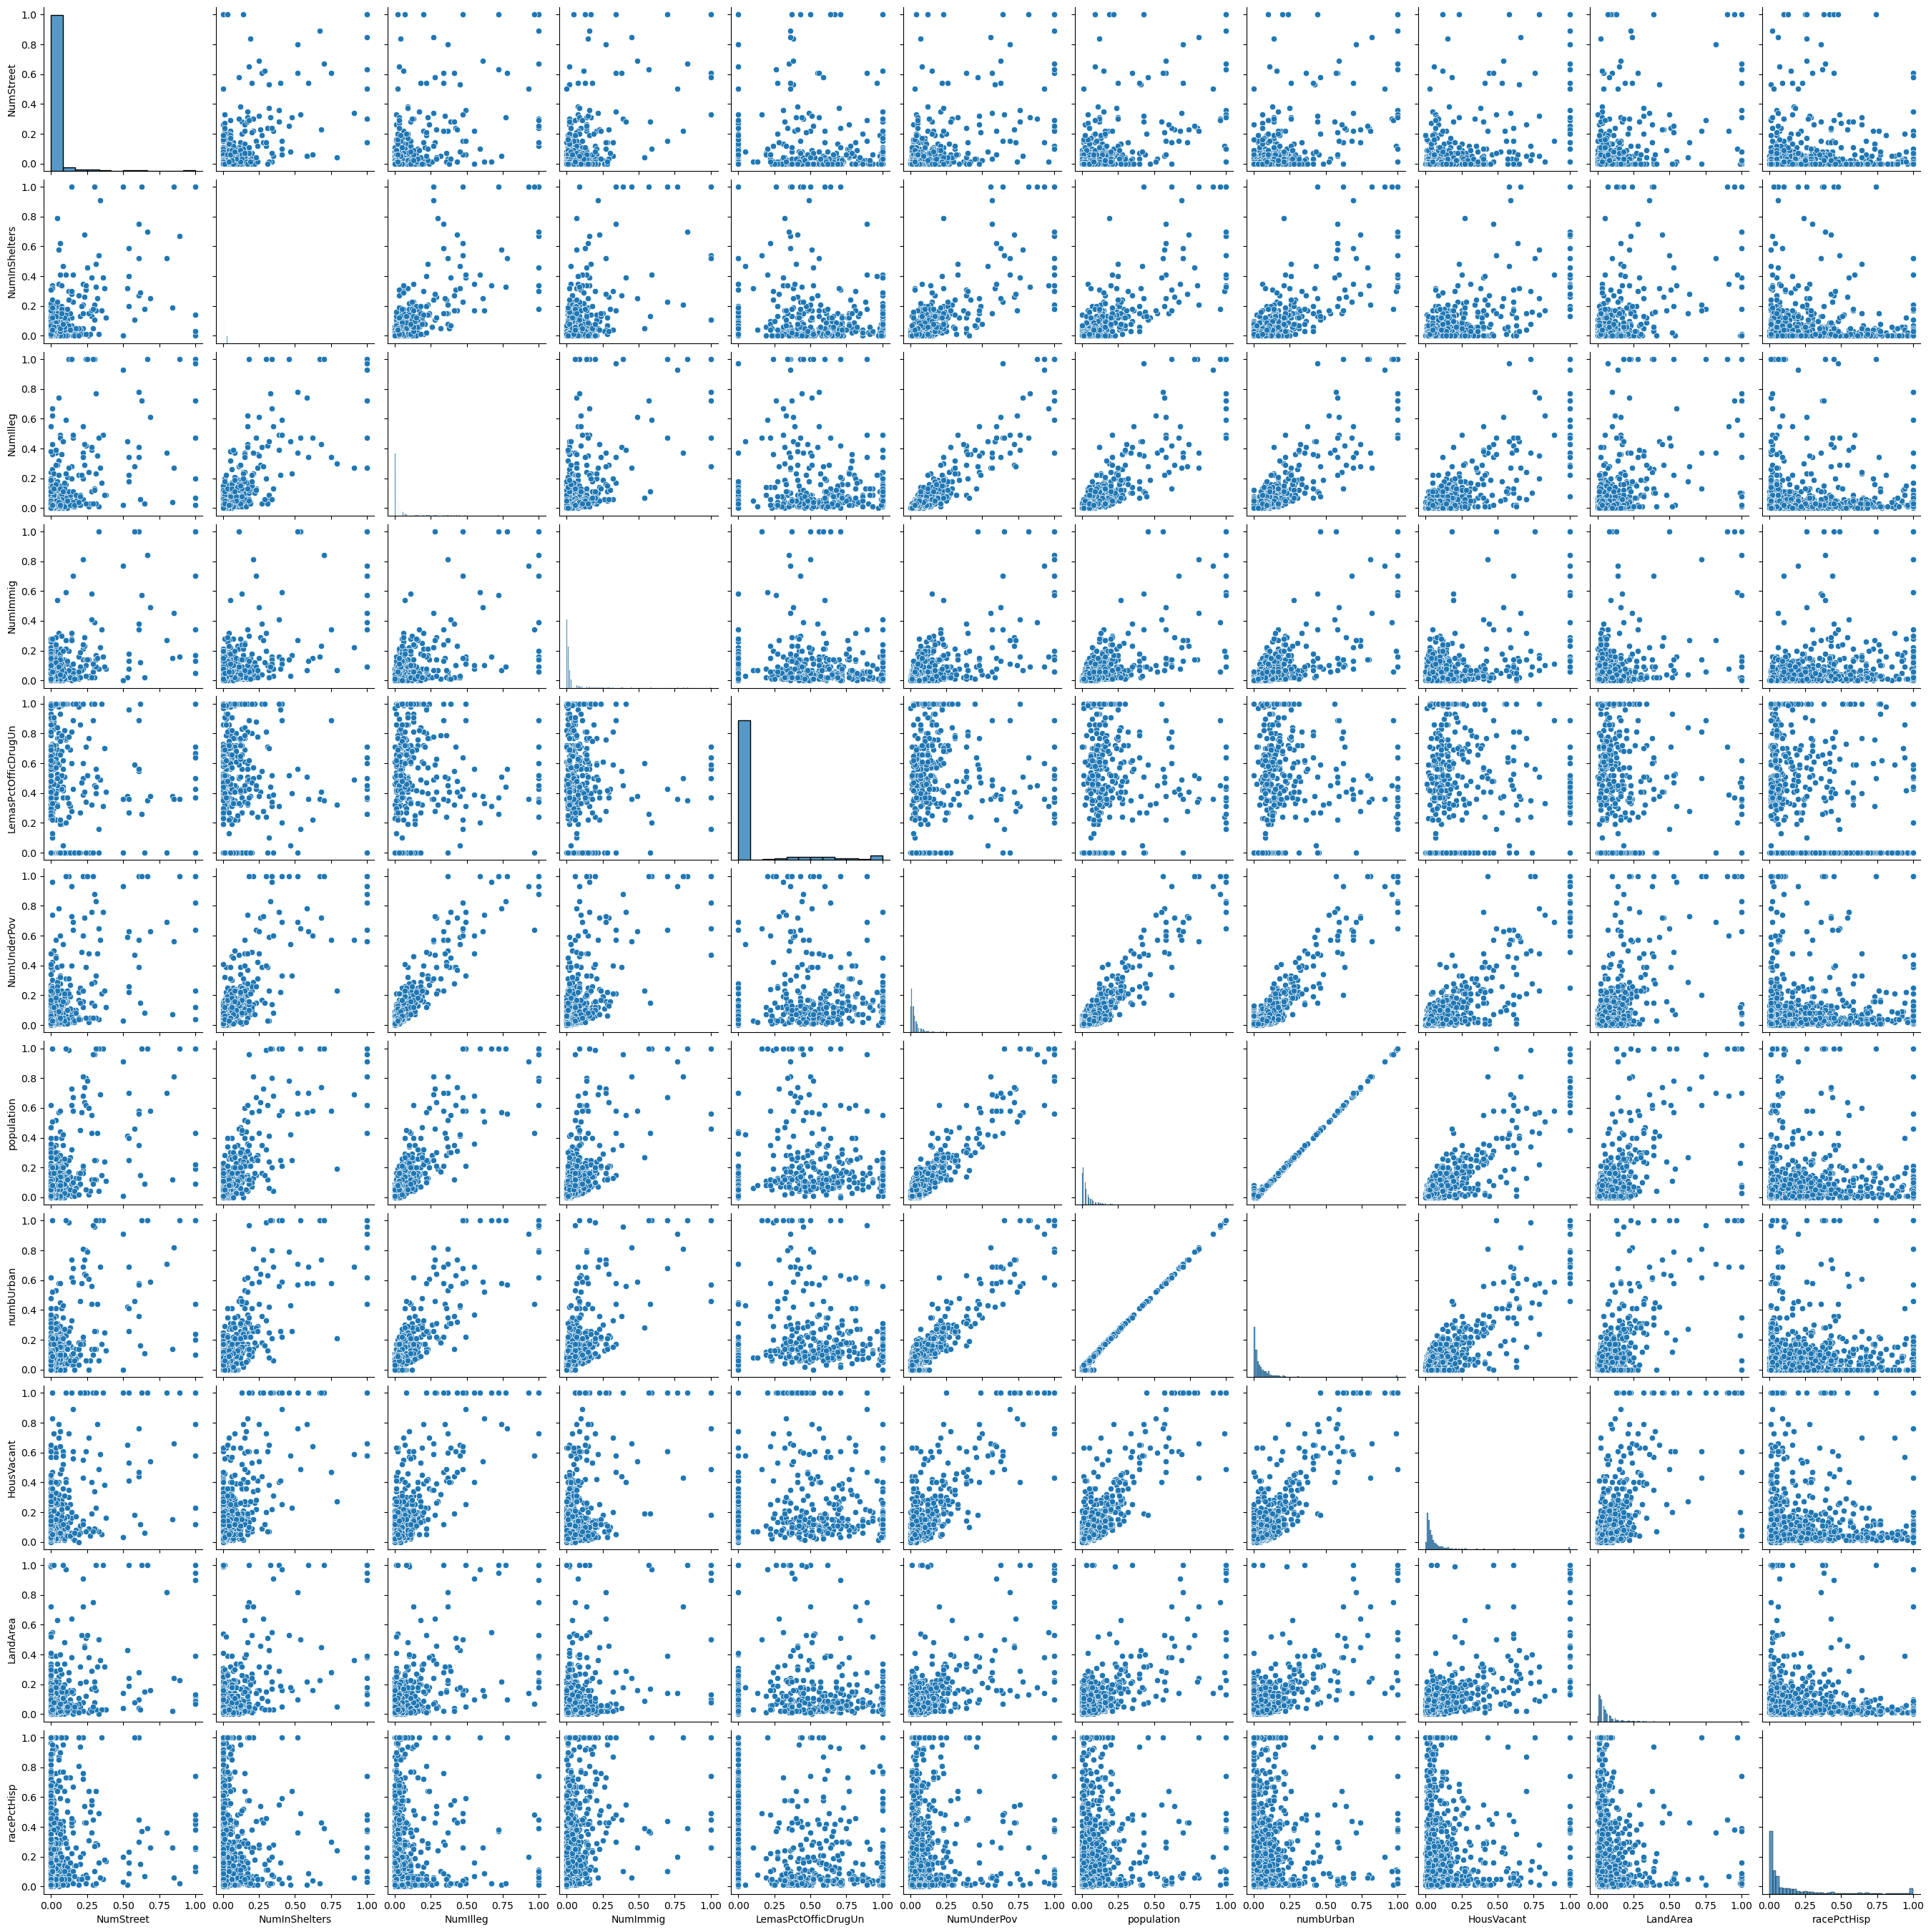

In [14]:
sns.pairplot(imputed_data[communities_highest_cv.index])

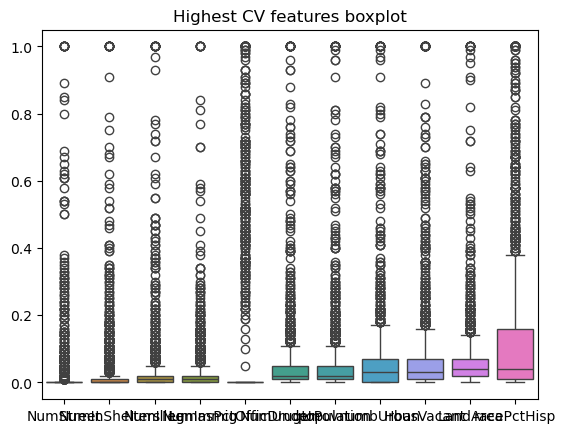

In [15]:
sns.boxplot(imputed_data[communities_highest_cv.index])
plt.title("Highest CV features boxplot")
plt.show()

No clear conclusion can be drawn just by looking at the scatterplots

(f) Fit a linear model using least squares to the training set and report the test error.

In [17]:
comm_train=imputed_data.iloc[:1495,:]
comm_test=imputed_data.iloc[1495:,:]
x_comm_train=comm_train.iloc[:,:-1]
y_comm_train=comm_train.iloc[:,-1:]
x_comm_test=comm_test.iloc[:,:-1]
y_comm_test=comm_test.iloc[:,-1:]

In [19]:
lin_reg=LinearRegression()
lin_reg.fit(x_comm_train,y_comm_train)
y_pred=lin_reg.predict(x_comm_test)
test_MSE=mean_squared_error(y_comm_test,y_pred)
print("Test MSE using linear model is ",test_MSE)

Test MSE using linear model is  0.7897255274396451


(g) Fit a ridge regression model on the training set, with  chosen by cross-validation.
Report the test error obtained.

In [20]:
alphas=[10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]
alphas

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [25]:
Kfold=KFold(5,random_state=42,shuffle=True)
RR_model=RidgeCV(alphas=alphas,cv=Kfold)
RR_model.fit(x_comm_train,y_comm_train)
rr_y_pred=RR_model.predict(x_comm_test)
rr_test_MSE=mean_squared_error(y_comm_test,rr_y_pred)
print("Test MSE using Ridge Regression model is ",rr_test_MSE)

Test MSE using Ridge Regression model is  0.0174402452377608


(h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4 features. Report the test error for both cases and
compare them

In [26]:
lasso_model=LassoCV(alphas=alphas,cv=Kfold)
lasso_model.fit(x_comm_train,y_comm_train)
lasso_y_pred=lasso_model.predict(x_comm_test)
lasso_test_MSE=mean_squared_error(y_comm_test, lasso_y_pred)
print("Test MSE using LASSO model is ", lasso_test_MSE)

Test MSE using LASSO model is  0.017790185551932517


In [68]:
lasso_model.coef_

array([-0.        ,  0.        ,  0.27301989, -0.        , -0.01781955,
        0.        ,  0.07565216, -0.29061001,  0.        ,  0.00422472,
       -0.        ,  0.04099877,  0.        , -0.09298375,  0.02902854,
       -0.10988478,  0.05914612,  0.04184844, -0.10979686,  0.        ,
       -0.        , -0.06910984, -0.02256881, -0.03193674,  0.02924137,
        0.023632  ,  0.0256811 , -0.        , -0.15011762, -0.02112093,
        0.        ,  0.01732404, -0.        ,  0.15503396, -0.01926548,
        0.        ,  0.01659294,  0.        ,  0.13269779,  0.15075759,
       -0.09536975, -0.        ,  0.        , -0.        , -0.19805153,
       -0.036045  , -0.01143961,  0.        , -0.13470476, -0.06580317,
        0.09555544, -0.0811766 , -0.        , -0.        , -0.        ,
       -0.00568434, -0.        ,  0.        ,  0.        ,  0.03936523,
       -0.        , -0.08134975, -0.        , -0.08955456,  0.07376902,
       -0.        , -0.        , -0.0642819 ,  0.23127041,  0.06

In [38]:
imp_indices=np.where(lasso_model.coef_!= 0)[0]
print(len(imp_indices))

78


In [30]:
for i in imp_indices:
    print(x_comm_train.columns[i])

racepctblack
racePctAsian
agePct12t21
agePct12t29
agePct65up
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctBSorMore
PctEmploy
PctEmplManu
PctOccupManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec10
PctRecImmig10
PctNotSpeakEnglWell
PctLargHouseOccup
PersPerOccupHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
OwnOccLowQuart
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
PolicReqPerOffic
RacialMatchCommPol
PctPolicWhite
PctPolicBlack
PctPolicHisp
PctPolicAsian
OfficAssgnDrugUnits
NumKindsDrugsSeiz
PolicAveOTWorked
LandArea
PopDens
PctUsePubT

In [33]:
scaler=StandardScaler()
scaled_train_x=scaler.fit_transform(x_comm_train)
scaled_test_x=scaler.fit_transform(x_comm_test)
lasso_model_std=LassoCV(alphas=alphas,cv=Kfold)
lasso_model_std.fit(scaled_train_x,y_comm_train)
lasso_std_pred=lasso_model_std.predict(scaled_test_x)
lasso_std_MSE=mean_squared_error(y_comm_test,lasso_std_pred)
print("Test MSE using LASSO model(standardized) is ",lasso_std_MSE)

Test MSE using LASSO model(standardized) is  0.017955051767110063


In [37]:
imp_indices_std=np.where(lasso_model_std.coef_!= 0)[0]
print(len(imp_indices_std))
for i in imp_indices_std:
    print(x_comm_train.columns[i])

68
racepctblack
agePct12t21
agePct12t29
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctEmploy
PctEmplManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec5
PctRecImmig10
PctNotSpeakEnglWell
PctLargHouseOccup
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctWOFullPlumb
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
PolicReqPerOffic
RacialMatchCommPol
PctPolicBlack
PctPolicHisp
PctPolicAsian
OfficAssgnDrugUnits
NumKindsDrugsSeiz
PolicAveOTWorked
LandArea
PopDens
PctUsePubTrans
PolicCars
LemasPctPolicOnPatr
LemasGangUnitDeploy


**LASSO with standardised features uses lesser number of features so has a slightly higher test error as compared to LASSO without standadisation**

(i) Fit a PCR model on the training set, with M (the number of principal compo-
nents) chosen by cross-validation. Report the test error obtained.

In [39]:
scaler=StandardScaler()
scaled_train_x=scaler.fit_transform(x_comm_train)
scaled_test_x=scaler.fit_transform(x_comm_test)
num_components=scaled_train_x.shape[1]
print(x_comm_train)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [40]:
Error_for_M={}
for i in range(1, num_components+1):
    pca=PCA(i)
    lr= LinearRegression()
    x=pca.fit_transform(scaled_train_x)
    scores=cross_val_score(lr,x,y_comm_train,cv=5,scoring="neg_mean_squared_error")
    error=np.mean(np.abs(scores))
    Error_for_M[str(i)]=error

min_M = min(Error_for_M, key=Error_for_M.get)
print("M value selected is ",min_M)   

M value selected is  95


In [41]:
M_val=int(min_M)
pca=PCA(M_val)
x_pca_train=pca.fit_transform(scaled_train_x)
x_pca_test=pca.transform(scaled_test_x)
lr_model=LinearRegression()
lr_model.fit(x_pca_train, y_comm_train)
y_pred_pca=lr_model.predict(x_pca_test)
pca_mse = mean_squared_error(y_comm_test, y_pred_pca)
print("Test MSE for PCR model: ",pca_mse)

Test MSE for PCR model:  0.018735172990159747


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine
 (the regularization term) using cross-validation.

In [43]:
Error_for_alpha={}
for i in alphas:
    regtree=xgb.XGBRegressor(reg_alpha=i)
    boost_scores=cross_val_score(regtree,scaled_train_x,y_comm_train,cv=5,scoring="neg_mean_squared_error")
    error=np.mean(np.abs(boost_scores))
    Error_for_alpha[str(i)]=error

min_alpha = min(Error_for_alpha, key=Error_for_alpha.get)
print("alpha value selected is ",min_alpha)



alpha value selected is  1


In [44]:
alpha_val=float(min_alpha)
regtree= xgb.XGBRegressor(reg_alpha=alpha_val, random_state=42)
regtree.fit(x_comm_train, y_comm_train)
y_pred_boost=regtree.predict(x_comm_test)
boost_mse=mean_squared_error(y_comm_test, y_pred_boost)
print("Test MSE for PCR model: ",boost_mse)


Test MSE for PCR model:  0.01775752449552266
